# Gtime 2
Example of TGraphTime showing how the class could be used to visualize
a set of particles with their time stamp in a MonteCarlo program.




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:48 AM.</small></i>

In [1]:
%%cpp -d
#include "TRandom3.h"
#include "TMath.h"
#include "TMarker.h"
#include "TPaveLabel.h"
#include "TArrow.h"
#include "TGraphTime.h"

 Arguments are defined. 

In [2]:
Int_t nsteps = 200;
Int_t np=5000;

In [3]:
if (np > 5000) np = 5000;
Int_t color[5000];
Double_t cosphi[5000], sinphi[5000], speed[5000];
TRandom3 r;
Double_t xmin = 0, xmax = 10, ymin = -10, ymax = 10;
TGraphTime *g = new TGraphTime(nsteps,xmin,ymin,xmax,ymax);
g->SetTitle("TGraphTime demo 2;X;Y");
Int_t i,s;
Double_t phi,fact = xmax/Double_t(nsteps);
for (i=0;i<np;i++) { //calculate some object parameters
   speed[i]  = r.Uniform(0.5,1);
   phi       = r.Gaus(0,TMath::Pi()/6.);
   cosphi[i] = fact*speed[i]*TMath::Cos(phi);
   sinphi[i] = fact*speed[i]*TMath::Sin(phi);
   Double_t rc = r.Rndm();
   color[i] = kRed;
   if (rc > 0.3) color[i] = kBlue;
   if (rc > 0.7) color[i] = kYellow;
}
for (s=0;s<nsteps;s++) { //fill the TGraphTime step by step
   for (i=0;i<np;i++) {
      Double_t xx = s*cosphi[i];
      if (xx < xmin) continue;
      Double_t yy = s*sinphi[i];
      TMarker *m = new TMarker(xx,yy,25);
      m->SetMarkerColor(color[i]);
      m->SetMarkerSize(1.5 -s/(speed[i]*nsteps));
      g->Add(m,s);
   }
   g->Add(new TPaveLabel(.70,.92,.98,.99,Form("shower at %5.3f nsec",3.*s/nsteps),"brNDC"),s);
}
g->Draw();

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Draw all canvases 

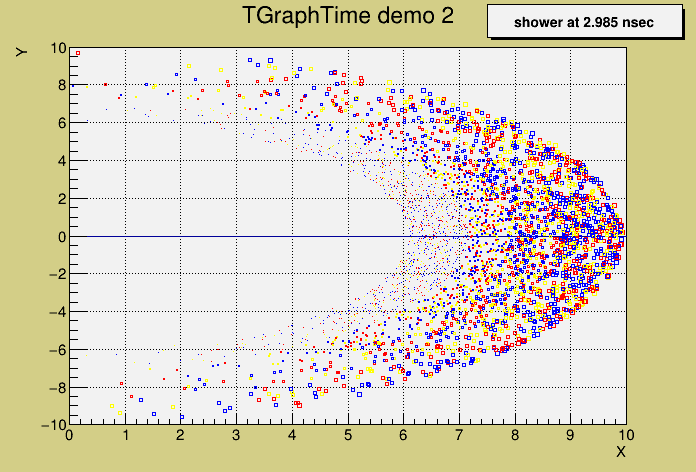

In [4]:
gROOT->GetListOfCanvases()->Draw()